In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
coursera_df = pd.read_csv('coursera_data.csv')

## Initial Analysis

In [3]:
def initial_analysis(df: pd.DataFrame) -> None:
    """
    Runs several pandas functions for initial analysis.
    """
    display(df.shape)
    display(df.head())
    display(df.tail())
    display(df.columns)
    display(df.info())
    [print(f'{i} contains {df[i].nunique()} unique values') for i in df.columns]
    [print(f'The dataframe contains {df.duplicated().sum()} duplicated values')]
    display(df.describe())

In [4]:
initial_analysis(coursera_df)

(891, 7)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


None

Unnamed: 0 contains 891 unique values
course_title contains 888 unique values
course_organization contains 154 unique values
course_Certificate_type contains 3 unique values
course_rating contains 14 unique values
course_difficulty contains 4 unique values
course_students_enrolled contains 205 unique values
The dataframe contains 0 duplicated values


,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


> The data is largely clean with no duplicates, correct data types, no null values, and nothing that looks super out of place upon initial inspection. 

> We have 7 features, 4 of them categorical and 3 of them numerical. 

> There are only a few things I want to change. First, dropping the Unnamed:0 column. Second, change the course_students_enrolled into a numerical column.  

## Data Cleaning

Issues 
- "Unnamed:0" column not needed
- values in course_students enrolled categorical 

Solutions 
- drop Unnamed:0 column
- change course_students enrolled column data type 


In [5]:
# making a copy of our original dataframe 
coursera_to_clean = coursera_df.copy()

In [6]:
# dropping "Unnamed:0" column
coursera_to_clean = coursera_to_clean.drop("Unnamed: 0",axis=1)

In [9]:
# changing course_students_enrolled column to numerical format
def convert_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        return float(value)

coursera_to_clean['course_students_enrolled'] = coursera_to_clean['course_students_enrolled'].apply(convert_to_numeric)


In [10]:
# testing to see how everything looks together 
coursera_to_clean.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


In [12]:
coursera_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 41.9+ KB


In [13]:
# exporting our clean dataset
coursera_to_clean.to_csv(r'coursera_data_clean.csv', index=False, header=True)

In [14]:
# importing our clean dataset
coursera_df = pd.read_csv('coursera_data_clean.csv')

In [15]:
coursera_df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


## Outlier Detection

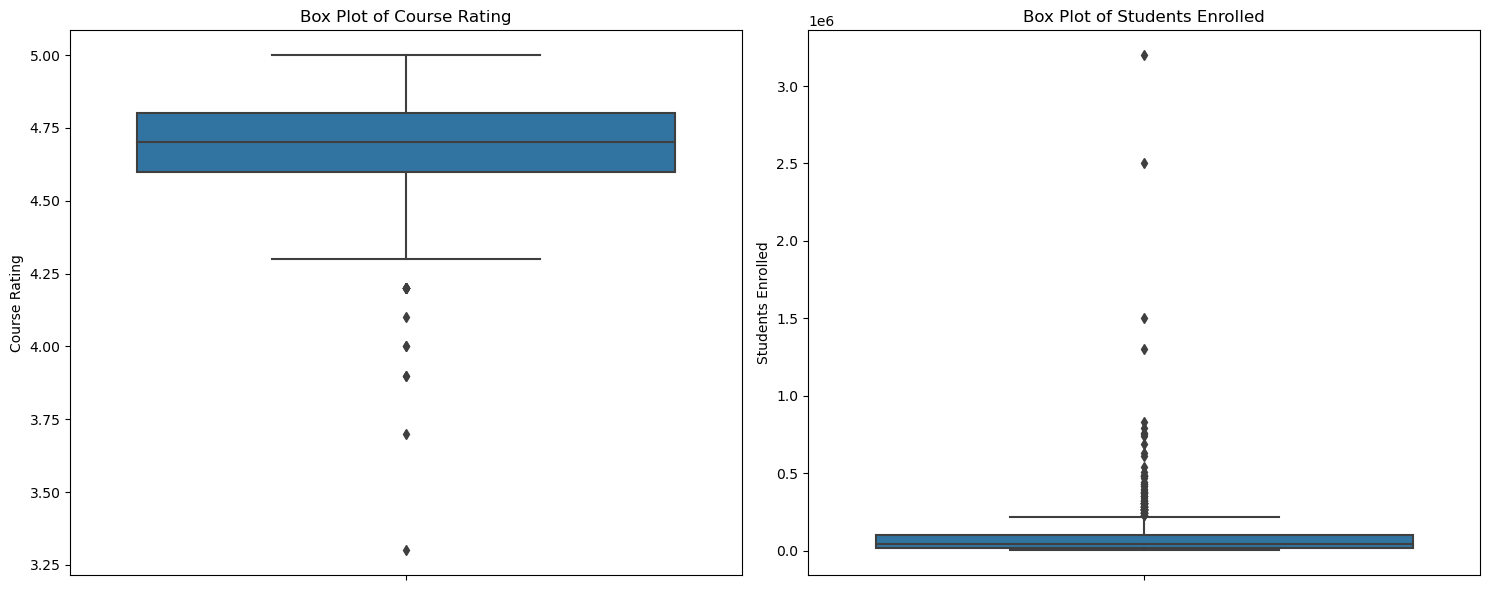

In [28]:
# Create box plots for the numerical columns
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(y=coursera_df['course_rating'], ax=ax[0])
ax[0].set_title('Box Plot of Course Rating')
ax[0].set_ylabel('Course Rating')

sns.boxplot(y=coursera_df['course_students_enrolled'], ax=ax[1])
ax[1].set_title('Box Plot of Students Enrolled')
ax[1].set_ylabel('Students Enrolled')

plt.tight_layout()
plt.show()

> Course Rating: The majority of ratings are between approximately 4.5 and 5.0, with a few courses having ratings slightly below 4.5. There are a few small outliers in this column.

> Students Enrolled: We can observe several points above the upper whisker, indicating potential outliers. These courses might have exceptionally high enrollment numbers compared to others.
To further quantify the outliers in the course_students_enrolled column, we can use the IQR method.

In [20]:
# Calculate IQR for course_students_enrolled
Q1 = coursera_df['course_students_enrolled'].quantile(0.25)
Q3 = coursera_df['course_students_enrolled'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = coursera_df[(coursera_df['course_students_enrolled'] < lower_bound) | 
                         (coursera_df['course_students_enrolled'] > upper_bound)]

# Display the outliers
outliers_count = len(outliers)
outliers_count, outliers.head()

(78,
                                          course_title  \
 4                 A Life of Happiness and Fulfillment   
 6                                     AI For Everyone   
 18                          Academic English: Writing   
 27                     Advanced Data Science with IBM   
 43  An Introduction to Programming the Internet of...   
 
                  course_organization course_Certificate_type  course_rating  \
 4          Indian School of Business                  COURSE            4.8   
 6                    deeplearning.ai                  COURSE            4.8   
 18  University of California, Irvine          SPECIALIZATION            4.7   
 27                               IBM          SPECIALIZATION            4.4   
 43  University of California, Irvine          SPECIALIZATION            4.6   
 
    course_difficulty  course_students_enrolled  
 4              Mixed                  320000.0  
 6           Beginner                  350000.0  
 18          

In [26]:
# Descriptive statistics for the outliers
outliers_description = outliers.describe()

# Determine if outliers are due to high or low enrollments
high_enrollment_outliers = outliers[outliers['course_students_enrolled'] > upper_bound]
low_enrollment_outliers = outliers[outliers['course_students_enrolled'] < lower_bound]

# Distribution of course difficulty among outliers
difficulty_distribution = outliers['course_difficulty'].value_counts()

outliers_description, len(high_enrollment_outliers), len(low_enrollment_outliers), difficulty_distribution

(       course_rating  course_students_enrolled
 count      78.000000              7.800000e+01
 mean        4.701282              4.596154e+05
 std         0.133381              4.507784e+05
 min         4.200000              2.300000e+05
 25%         4.600000              2.700000e+05
 50%         4.700000              3.150000e+05
 75%         4.800000              4.375000e+05
 max         4.900000              3.200000e+06,
 78,
 0,
 Beginner        42
 Mixed           20
 Intermediate    15
 Advanced         1
 Name: course_difficulty, dtype: int64)

> Number of Enrolled Students:
All 78 outliers have high enrollment numbers. There are no outliers due to low enrollment.

> Course Rating:
The course ratings for the outliers range from 4.2 to 4.9, which are generally high and not significantly different from the overall dataset.

> Course Difficulty Distribution among Outliers:
- Beginner: 42
- Mixed: 20
- Intermediate: 15
- Advanced: 1

> From the above findings, it seems that the primary reason these courses are considered outliers is due to their exceptionally high enrollment numbers. The course ratings for these outliers are generally high, and the majority of them are beginner level courses, followed by mixed and intermediate levels.

> I'm going to leave the outliers seeing as my goal is to understand the dataset I feel that removing them would lead to a misrepresentation of the data. 

## Univariate

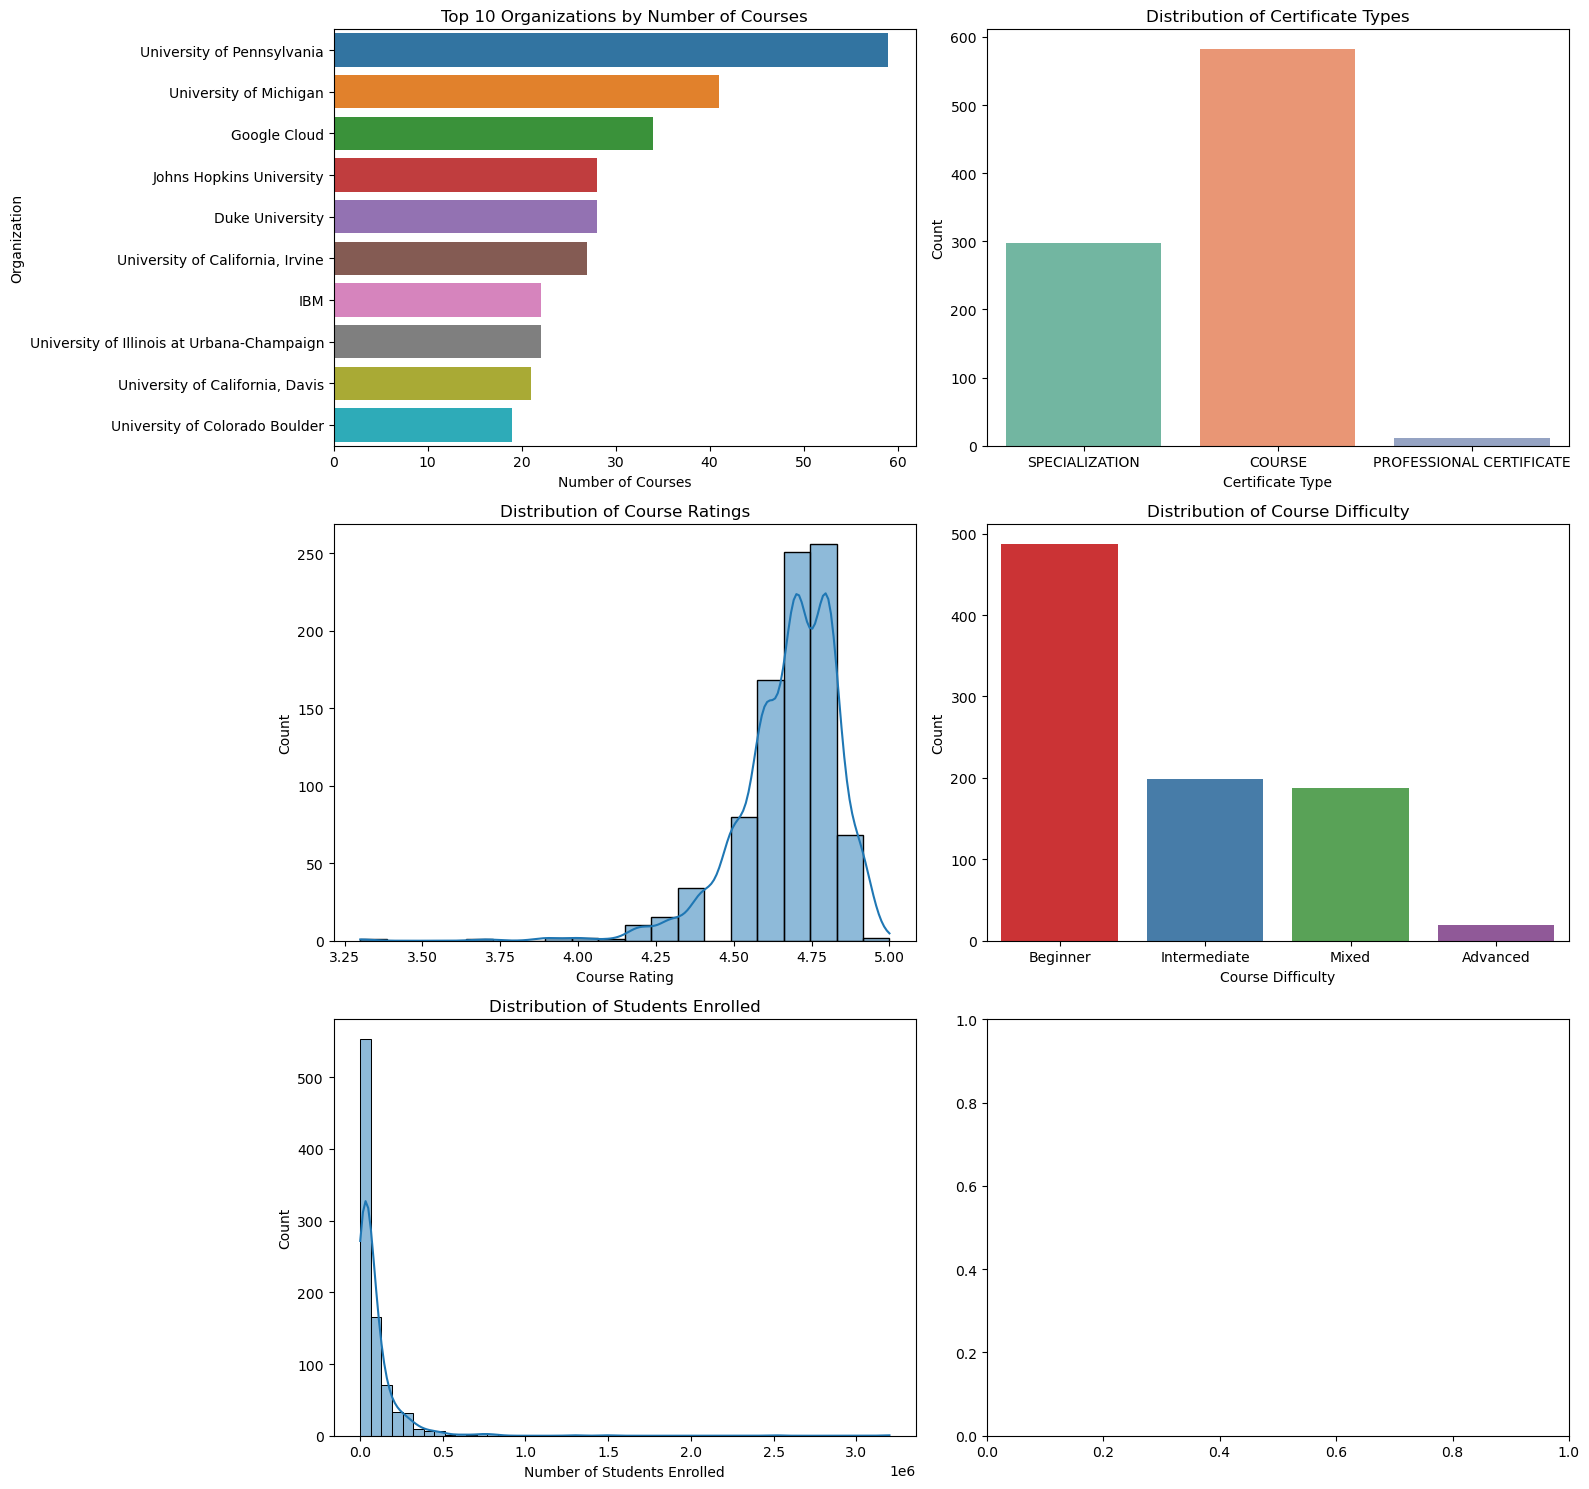

888

In [31]:
# Set up the figure and axes
fig, ax = plt.subplots(3, 2, figsize=(16, 15))

# Plotting for course_organization
sns.countplot(data=coursera_df, y='course_organization', order=coursera_df['course_organization'].value_counts().index[:10], ax=ax[0, 0])
ax[0, 0].set_title('Top 10 Organizations by Number of Courses')
ax[0, 0].set_xlabel('Number of Courses')
ax[0, 0].set_ylabel('Organization')

# Plotting for course_Certificate_type
sns.countplot(data=coursera_df, x='course_Certificate_type', ax=ax[0, 1], palette='Set2')
ax[0, 1].set_title('Distribution of Certificate Types')
ax[0, 1].set_xlabel('Certificate Type')
ax[0, 1].set_ylabel('Count')

# Plotting for course_rating
sns.histplot(data=coursera_df, x='course_rating', bins=20, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Course Ratings')
ax[1, 0].set_xlabel('Course Rating')
ax[1, 0].set_ylabel('Count')

# Plotting for course_difficulty
sns.countplot(data=coursera_df, x='course_difficulty', ax=ax[1, 1], palette='Set1')
ax[1, 1].set_title('Distribution of Course Difficulty')
ax[1, 1].set_xlabel('Course Difficulty')
ax[1, 1].set_ylabel('Count')

# Plotting for course_students_enrolled
sns.histplot(data=coursera_df, x='course_students_enrolled', bins=50, ax=ax[2, 0], kde=True)
ax[2, 0].set_title('Distribution of Students Enrolled')
ax[2, 0].set_xlabel('Number of Students Enrolled')
ax[2, 0].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Number of unique courses
unique_courses = coursera_df['course_title'].nunique()
unique_courses

### Univariate Insights 

> course_title: 
There are 888 unique courses in the dataset.

> course_organization:
The top organizations, in terms of the number of courses offered, are clearly visible. Some organizations have a significant presence on Coursera with a high number of courses.

> course_Certificate_type:
The majority of courses are standalone courses, followed by specializations. Professional certificates are relatively less frequent.

> course_rating:
The ratings are skewed towards higher values, with most courses having a rating between 4.5 and 5.0. This indicates a generally positive reception of Coursera courses by learners.

> course_difficulty:
Beginner-level courses are the most common, followed by mixed and intermediate levels. Advanced courses are the least common.

> course_students_enrolled:
The majority of courses have enrollments in the lower range, with a few courses having exceptionally high enrollments (as seen by the long tail in the histogram).

> Coursera offers a wide variety of courses, predominantly at the beginner level, and they are generally well-received by learners as indicated by the high ratings. However, while many courses have moderate enrollments, there are a few standout courses that attract a significant number of students.


## Bivariate

### Do certain organizations consistently receive higher ratings?

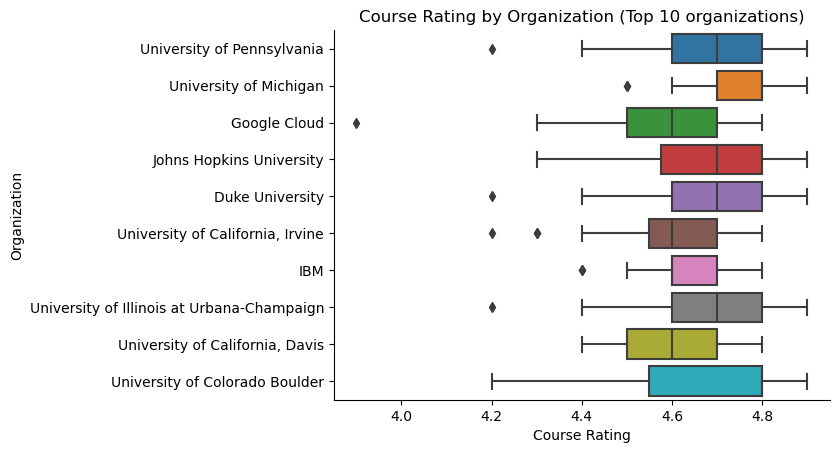

In [40]:
ax = sns.boxplot(data=coursera_df, x='course_rating', y='course_organization',
                 order=coursera_df['course_organization'].value_counts().index[:10])
plt.title('Course Rating by Organization (Top 10 organizations)')
plt.xlabel('Course Rating')
plt.ylabel('Organization')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Most of the top 10 organizations (by course count) have median course ratings between approximately 4.5 and 5.0. This indicates a generally positive reception of courses from these organizations.
The spread of ratings (interquartile range) is relatively tight for most organizations, suggesting consistent course quality.

### How does course difficulty affect course rating?

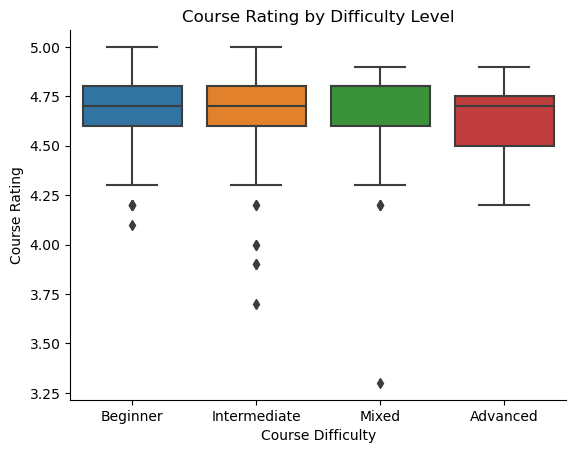

In [41]:
ax = sns.boxplot(data=coursera_df, x='course_difficulty', y='course_rating')
plt.title('Course Rating by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> All difficulty levels generally have high median ratings, between 4.5 and 5.0. The spread of ratings is similar across difficulty levels, though the "Advanced" level has a slightly wider spread.

### Do course enrollment numbers affect course rating?

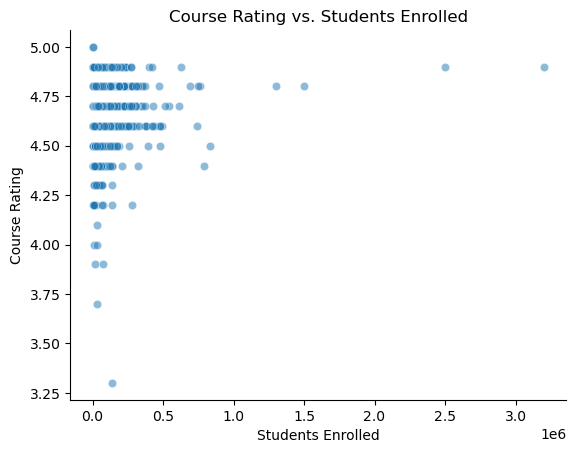

In [42]:
ax = sns.scatterplot(data=coursera_df, x='course_students_enrolled', y='course_rating', alpha=0.5)
plt.title('Course Rating vs. Students Enrolled')
plt.xlabel('Students Enrolled')
plt.ylabel('Course Rating')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> There isn't a clear trend between the number of students enrolled and course ratings. Both high and low enrollment courses can have high ratings. There are a few courses with very high enrollments, and their ratings are also generally high.

### Does certificate type affect course ratings?

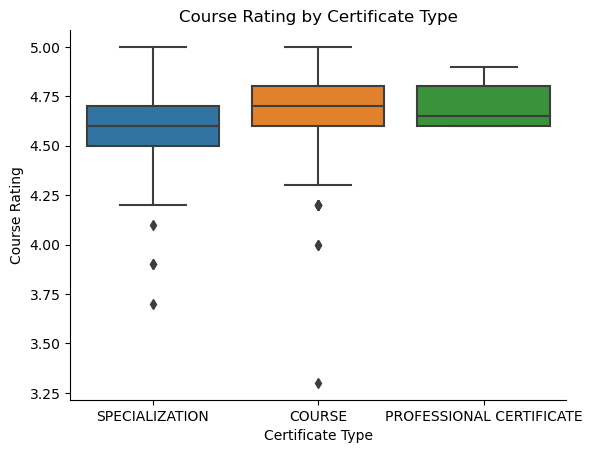

In [43]:
ax = sns.boxplot(data=coursera_df, x='course_Certificate_type', y='course_rating')
plt.title('Course Rating by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Course Rating')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> All certificate types have high median ratings, between 4.5 and 5.0. Courses and professional certificates have a slightly tighter spread of ratings compared to specializations.

### Does course difficulty affect student enrollment?

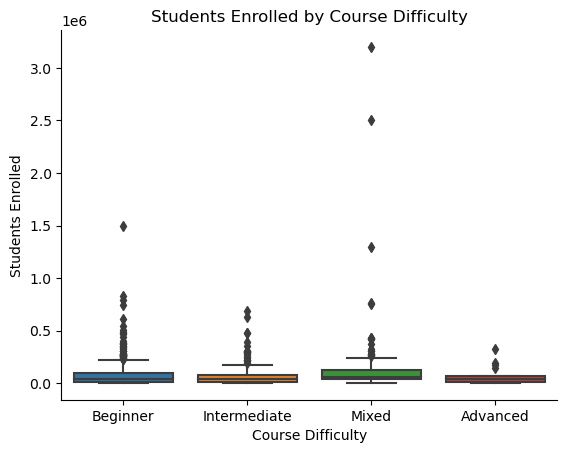

In [44]:
ax = sns.boxplot(data=coursera_df, x='course_difficulty', y='course_students_enrolled')
plt.title('Students Enrolled by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Students Enrolled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Beginner courses have the highest median enrollment, followed by Mixed and Intermediate courses. Advanced courses have the lowest median enrollment, indicating that they might be more niche or specialized.

### Does certificate type affect student enrollment?

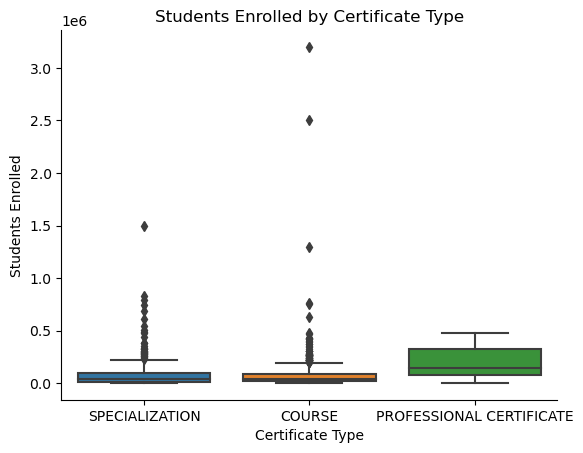

In [45]:
ax = sns.boxplot(data=coursera_df, x='course_Certificate_type', y='course_students_enrolled')
plt.title('Students Enrolled by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Students Enrolled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Standalone courses tend to have a wider distribution of student enrollments, with many courses having moderate enrollments and a few having exceptionally high enrollments. Specializations and professional certificates generally have higher median enrollments compared to standalone courses. This might be because these certificates provide more comprehensive content or are more appealing to students looking for structured pathways.

### Do certain organizations tend to offer courses of certain difficulty levels?

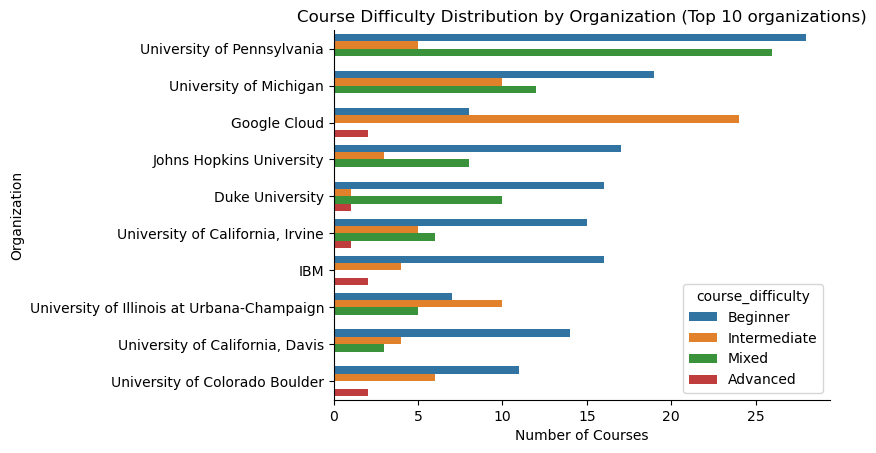

In [47]:
ax = sns.countplot(data=coursera_df, y='course_organization', hue='course_difficulty', 
              order=coursera_df['course_organization'].value_counts().index[:10])
plt.title('Course Difficulty Distribution by Organization (Top 10 organizations)')
plt.xlabel('Number of Courses')
plt.ylabel('Organization')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Among the top 10 organizations, most offer a mix of beginner, mixed, and intermediate courses. Some organizations, like the University of Michigan, offer a balanced distribution across all difficulty levels.

### Do certain organizations have courses with higher enrollment?

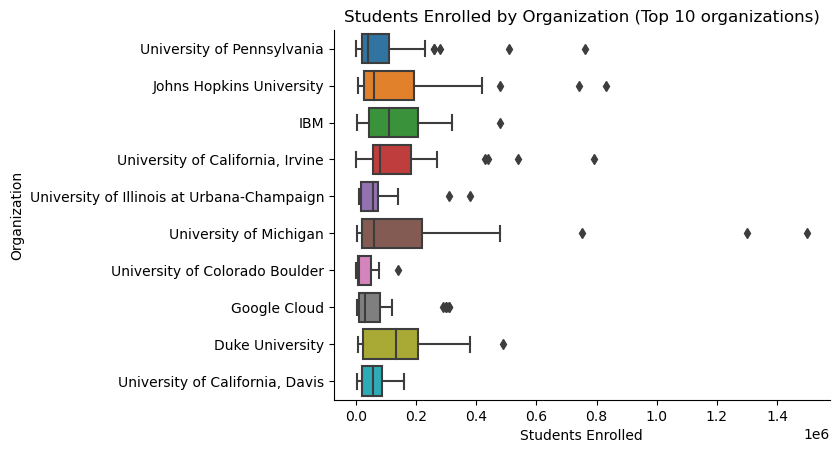

In [50]:
top_orgs = coursera_df['course_organization'].value_counts().index[:10]
ax2 = sns.boxplot(data=coursera_df[coursera_df['course_organization'].isin(top_orgs)], 
            y='course_organization', x='course_students_enrolled')
plt.title('Students Enrolled by Organization (Top 10 organizations)')
plt.xlabel('Students Enrolled')
plt.ylabel('Organization')


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

> Different organizations have varying distributions of enrollments. Some, like Google Cloud, have a relatively high median enrollment, while others have a broader range.
Organizations like deeplearning.ai have a few standout courses with very high enrollments.

### Are there trends between certain organizations and their course ratings?

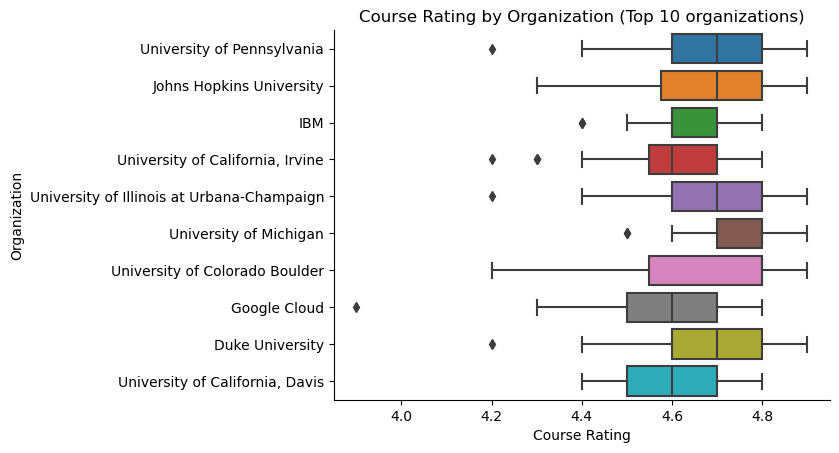

In [53]:
ax = sns.boxplot(data=coursera_df[coursera_df['course_organization'].isin(top_orgs)], 
            y='course_organization', x='course_rating')
plt.title('Course Rating by Organization (Top 10 organizations)')
plt.xlabel('Course Rating')
plt.ylabel('Organization')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> The top 10 organizations generally have high median ratings for their courses, with most falling between 4.5 and 5.0. The spread of ratings (interquartile range) is relatively tight for most organizations, indicating consistent course quality.

### What's the distribution between difficulty levels and certificate types?

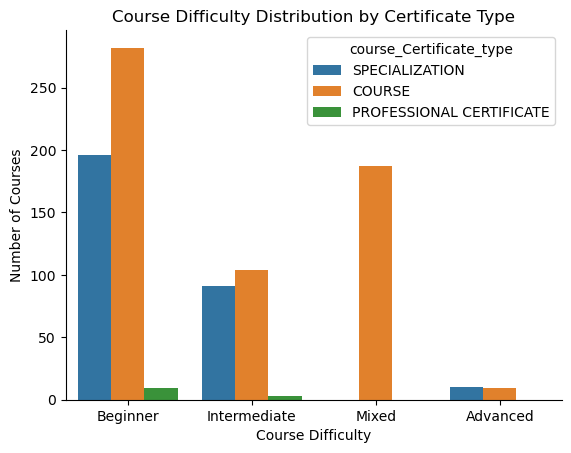

In [55]:
ax = sns.countplot(data=coursera_df, x='course_difficulty', hue='course_Certificate_type')
plt.title('Course Difficulty Distribution by Certificate Type')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Courses')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Standalone courses and specializations have a good mix of difficulty levels, with beginner courses being the most prevalent. Professional certificates are predominantly at the beginner and intermediate levels.

### Bivariate Insights 

> The ratings for courses on Coursera are generally high across different organizations, difficulty levels, and certificate types.

> Enrollment numbers vary, but there isn't a clear correlation between the number of enrolled students and course ratings.

> Beginner courses tend to have higher enrollments, possibly due to their accessibility to a wider audience.

> Organizations have varying focuses when it comes to course difficulty, with some offering a balanced mix while others focus more on specific levels.

> Certificate type seems to influence enrollments, with structured pathways like specializations and professional certificates attracting more students.

> Top organizations consistently offer high-quality courses, as reflected in the ratings.

## Multivariate

### How do course difficulty and certifacte type influence course ratings? 

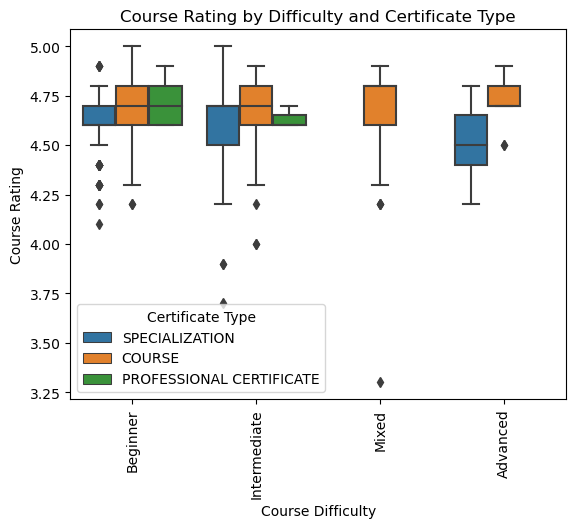

In [57]:
sns.boxplot(data=coursera_df, x='course_difficulty', y='course_rating', hue='course_Certificate_type')
plt.title('Course Rating by Difficulty and Certificate Type')
plt.xticks(rotation=90)
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')

plt.legend(title='Certificate Type')
plt.show()

> Regardless of the certificate type, courses of all difficulty levels generally have high ratings, with medians between 4.5 and 5.0. There doesn't seem to be a significant interaction between difficulty level and certificate type in influencing course ratings.

### Do specific organizations tend to have higher enrollments for courses of certain difficulty levels?

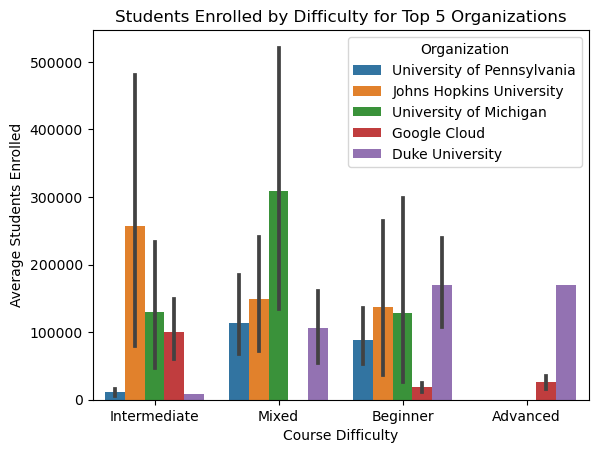

In [59]:
top_orgs = coursera_df['course_organization'].value_counts().index[:5]
subset_data = coursera_df[coursera_df['course_organization'].isin(top_orgs)]
sns.barplot(data=subset_data, x='course_difficulty', y='course_students_enrolled', hue='course_organization')
plt.title('Students Enrolled by Difficulty for Top 5 Organizations')
plt.xlabel('Course Difficulty')
plt.ylabel('Average Students Enrolled')
plt.legend(title='Organization')

plt.show()

> Different organizations have varying preferences or specializations in course difficulty. For instance, Google Cloud and deeplearning.ai seem to focus more on intermediate courses.
For most of the top organizations, beginner and mixed-difficulty courses tend to attract higher enrollments on average.

### What is the relationship between certificate type, course ratings, and the number of students enrolled?

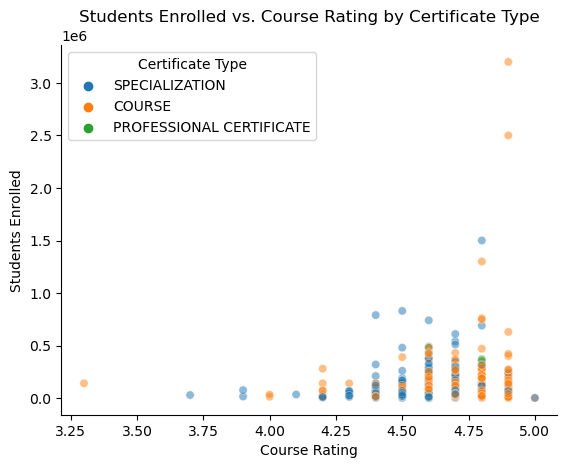

In [60]:
ax = sns.scatterplot(data=coursera_df, x='course_rating', y='course_students_enrolled', hue='course_Certificate_type', alpha=0.5)
plt.title('Students Enrolled vs. Course Rating by Certificate Type')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.legend(title='Certificate Type')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Most courses, regardless of their certificate type, have high ratings. There's no clear trend between course ratings and the number of enrollments. However, it's evident that a few courses (likely outliers) with very high enrollments maintain high ratings. Professional certificates and specializations have courses with notably high enrollments.

### Do courses of certain difficulty levels and certificate types tend to attract more students?

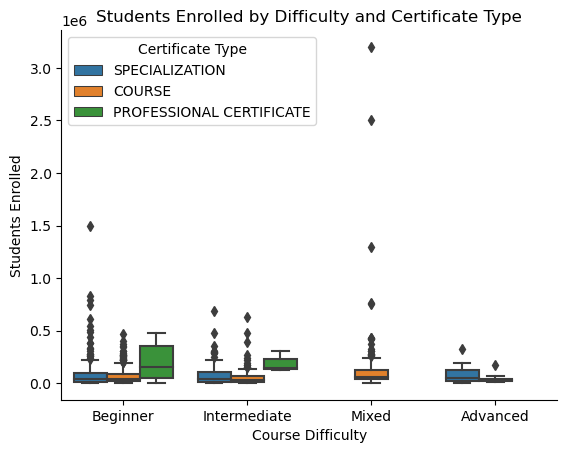

In [61]:
ax = sns.boxplot(data=coursera_df, x='course_difficulty', y='course_students_enrolled', hue='course_Certificate_type')
plt.title('Students Enrolled by Difficulty and Certificate Type')
plt.xlabel('Course Difficulty')
plt.ylabel('Students Enrolled')
plt.legend(title='Certificate Type')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Beginner courses tend to have higher enrollments across all certificate types. For standalone courses and specializations, the enrollment distribution seems consistent across difficulty levels. However, professional certificates for intermediate courses tend to attract more students than beginner or advanced levels.

### Is there a relationship between the organization and certificate type in influencing course ratings for the top organizations?

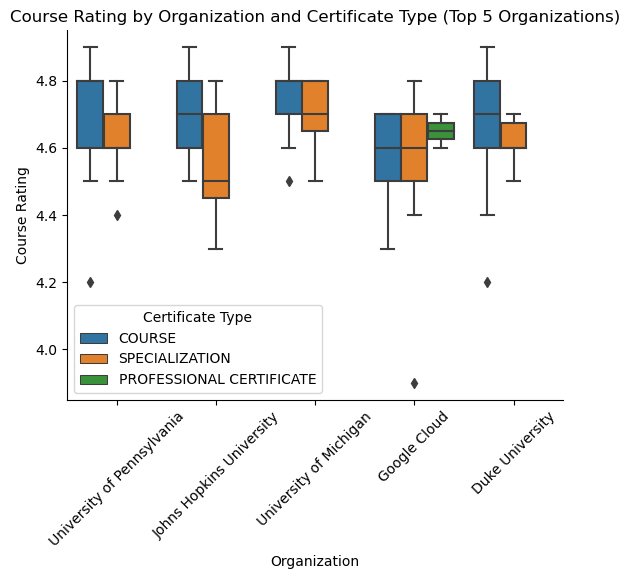

In [65]:
top_orgs = coursera_df['course_organization'].value_counts().index[:5]
subset_data = coursera_df[coursera_df['course_organization'].isin(top_orgs)]
ax = sns.boxplot(data=subset_data, x='course_organization', y='course_rating', hue='course_Certificate_type')
plt.title('Course Rating by Organization and Certificate Type (Top 5 Organizations)')
plt.xlabel('Organization')
plt.ylabel('Course Rating')
plt.legend(title='Certificate Type')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.show()

> For the top 5 organizations, the course ratings are consistently high, with median ratings hovering around 4.6-4.8. Most organizations have similar rating distributions across different certificate types, with slight variations. The University of Pennsylvania, for instance, has slightly higher ratings for its specialization courses than for its standalone courses.

### Do courses of certain difficulty levels attract more students, and how this is related to their ratings?

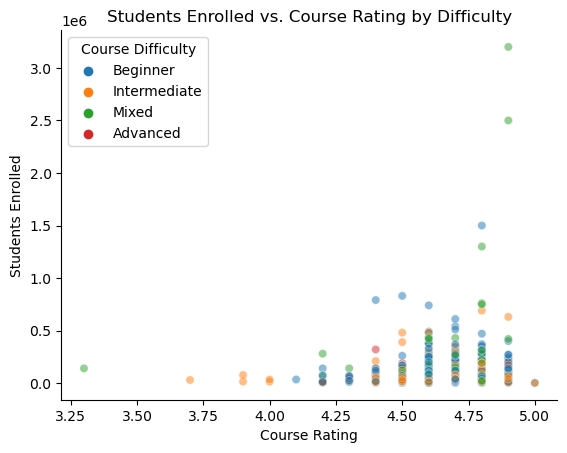

In [66]:
ax = sns.scatterplot(data=coursera_df, x='course_rating', y='course_students_enrolled', hue='course_difficulty', alpha=0.5)
plt.title('Students Enrolled vs. Course Rating by Difficulty')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.legend(title='Course Difficulty')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

> Courses across all difficulty levels generally have high ratings, with a few exceptions. There's a cluster of beginner courses with very high enrollments, indicating their popularity.
There doesn't seem to be a strong correlation between the number of students enrolled and the course rating. This suggests that even courses with high enrollments manage to maintain good quality, as reflected in their ratings.

## What can we see if we look at data correlations? 

In [67]:
df_corr = coursera_df.copy()

In [75]:
correlation = df_corr.corr()

In [76]:
# Display the upper triangle of the correlation matrix (to avoid redundancy)
correlation_matrix_upper = correlation.where(
    np.triu(np.ones(correlation.shape), k=1).astype(bool)
)

correlation_matrix_upper.dropna(how="all", inplace=True)
correlation_matrix_upper.dropna(axis=1, how="all", inplace=True)

correlation_matrix_upper

,course_students_enrolled
course_rating,0.07109


> The correlation coefficient is approximately 0.07109, which indicates a very weak positive correlation between the course rating and the number of students enrolled.
This means that there's a slight tendency for courses with higher ratings to have more students enrolled, but the relationship is not strong.